## Цели и задачи

В ходе исследования ответим на следующие вопросы:
- Команды с наибольшим кол-вом сыгранных матчей
- Команды с наибольшим кол-вом выигранных матчей
- Команды с наибольшим процентом побед
- Среднее кол-во голов за игру в 20 и 21 веке
- Среднее кол-во голов и кол-во сыгранных матчей по годам
- Самые забивные команды
- Самые забивные турниры

## Импорт библиотек

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

In [4]:
df = pd.read_csv(r'E:\датасеты\results.csv')



In [5]:
df.sample(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
10999,1979-07-06,Ivory Coast,Sudan,4,0,African Cup of Nations qualification,Abidjan,Ivory Coast,False
35184,2013-03-24,Mozambique,Guinea,0,0,FIFA World Cup qualification,Maputo,Mozambique,False
27267,2004-11-17,Thailand,Yemen,1,1,FIFA World Cup qualification,Bangkok,Thailand,False
41951,2020-11-14,Switzerland,Spain,1,1,UEFA Nations League,Basel,Switzerland,False
5738,1964-11-04,Germany,Sweden,1,1,FIFA World Cup qualification,Berlin,Germany,False
14469,1986-10-15,Poland,Greece,2,1,UEFA Euro qualification,Poznań,Poland,False
22694,2000-02-14,Kuwait,Bhutan,20,0,AFC Asian Cup qualification,Kuwait City,Kuwait,False
35492,2013-08-14,Belgium,France,0,0,Friendly,Brussels,Belgium,False
18359,1994-04-03,Ghana,Ivory Coast,1,2,African Cup of Nations,Sousse,Tunisia,True
25026,2002-07-22,Iraq,Syria,2,1,Friendly,Baghdad,Iraq,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43375 entries, 0 to 43374
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        43375 non-null  object
 1   home_team   43375 non-null  object
 2   away_team   43375 non-null  object
 3   home_score  43375 non-null  int64 
 4   away_score  43375 non-null  int64 
 5   tournament  43375 non-null  object
 6   city        43375 non-null  object
 7   country     43375 non-null  object
 8   neutral     43375 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.7+ MB


In [7]:
# проверим кол-во дубликатов
df.duplicated().sum()

0

Дубликатов и значений null нет


In [8]:
# приведем дату к нужному типу и укажем год 
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

In [9]:
# создадим столбец с кол-вом голов за матч
df['total_score'] = df['home_score'] + df['away_score']




In [10]:
def resul(row):
    home_goals = row['home_score']
    away_goals = row['away_score']
    home_t = row['home_team']
    away_t = row['away_team']
    
    if home_goals > away_goals:
        return home_t
    elif home_goals == away_goals:
        return 'draw'
    else:
        return away_t

    
    

In [11]:
# функция для графиков
def autolabel(rects, labels=None, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % float(height)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')


In [12]:
# применим функцию
df['winner'] = df.apply(resul,axis=1)

In [13]:
country_home = df[['home_team']]
country_away = df[['away_team']].rename(columns={'away_team':'home_team'})
country = pd.concat([country_home,country_away])
country.columns = ['country']
country

,country
0,Scotland
1,England
2,Scotland
3,England
4,Scotland
...,...
43370,El Salvador
43371,United States
43372,Canada
43373,Honduras


In [14]:
# общее кол-во матчей сыгранных за все время по странам
matches = country.groupby('country').agg({'country':'count'})\
         .rename(columns={'country':'matches'})\
         .sort_values(by='matches',ascending=False)\
         .reset_index()
 

# общее кол-во побед за все время по странам
wins = df.query('winner != "draw"')\
      .groupby('winner').agg({'winner':'count'})\
      .rename(columns={'winner':'win_sum'})\
      .sort_values(by='win_sum',ascending=False)\
      .reset_index()


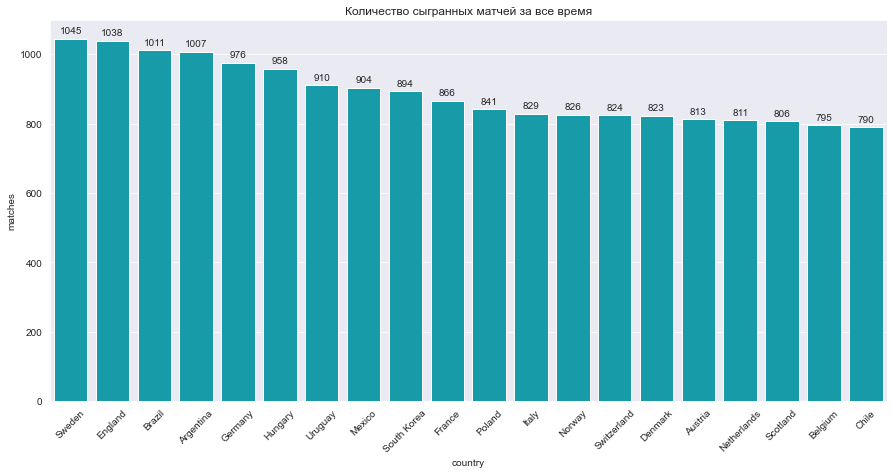

In [15]:
plt.figure(figsize=(15,7))

sns.set_style('darkgrid')
plt.xticks(rotation=45)
plt.title('Количество сыгранных матчей за все время')

bars = sns.barplot(data=matches.head(20),x='country',y='matches',color='#00AFC1')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)


ax = plt.gca()
autolabel(ax.patches, height_factor=1.01)

Наибольшее кол-во игр было сыграно Швецией, в топ 3 также вышли родоначальники футбола - Англичани и "кудесники мяча" - Бразильцы

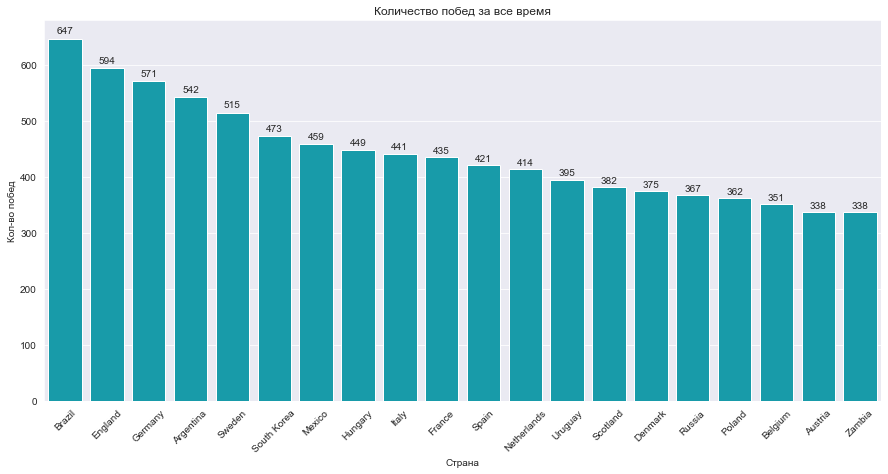

In [16]:
plt.figure(figsize=(15,7))

sns.set_palette('coolwarm') 
sns.set_style('darkgrid')
plt.xticks(rotation=45)
plt.title('Количество побед за все время')


bars = sns.barplot(data=wins.head(20),x='winner',y='win_sum',color='#00AFC1')
bars.set(xlabel='Страна', ylabel='Кол-во побед')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

ax = plt.gca()
autolabel(ax.patches, height_factor=1.01)

Наибольшее кол-во побед у Бразильцев, Англичан и Немцев. Россия занимает 16-е место с 362 победами

Посмотрим на процент побед

In [17]:
percent_of_wins = matches.merge(wins,how='left',left_on='country',right_on='winner')\
                         .fillna(0)\
                         .drop(columns='winner',axis=1)

percent_of_wins['percent %'] = round(percent_of_wins['win_sum'] / percent_of_wins['matches'] * 100,2)
percent_of_wins.sort_values(by='percent %',ascending=False)

,country,matches,win_sum,percent %
310,Surrey,1,1.0,100.00
308,Asturias,1,1.0,100.00
298,Canary Islands,4,3.0,75.00
283,Yorkshire,7,5.0,71.43
229,Padania,43,29.0,67.44
...,...,...,...,...
306,Niue,2,0.0,0.00
307,Brunei Darussalam,1,0.0,0.00
262,Tibet,13,0.0,0.00
309,Madrid,1,0.0,0.00


Как ни странно наибольший процент побед показали нефутбольные страны из-за того, что сыграли мало матчей. Отфильтруем данные и возьмем сборные сыгравшие больше 100 игр

In [18]:
more_100_winperate = percent_of_wins.query('matches > 100').sort_values(by='percent %',ascending=False)


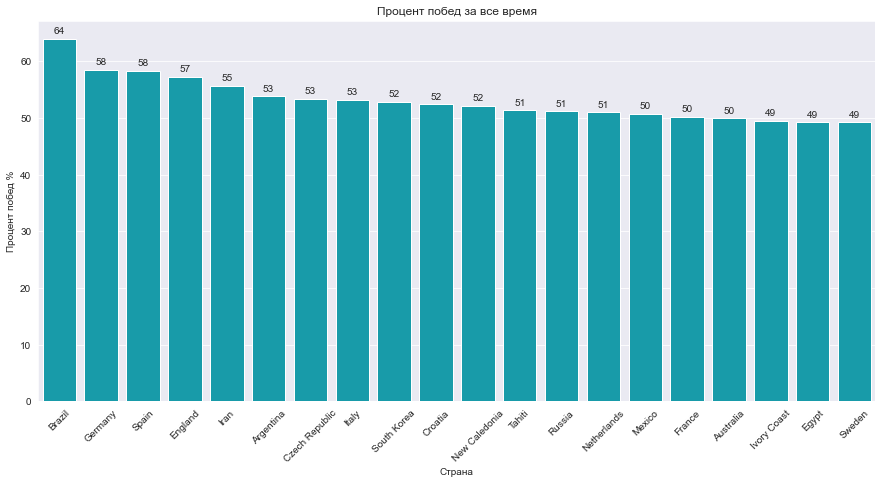

In [19]:
plt.figure(figsize=(15,7))

sns.set_palette('coolwarm') 
sns.set_style('darkgrid')
plt.xticks(rotation=45)
plt.title('Процент побед за все время')


bars = sns.barplot(data=more_100_winperate.head(20),x='country',y='percent %',color='#00AFC1')
bars.set(xlabel='Страна', ylabel='Процент побед %')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

ax = plt.gca()
autolabel(ax.patches, height_factor=1.01)

Логично, что наибольший процент побед у стран с наибольшим кол-вом титулов чемпионов мира, 4-е место у Англии и на 5 место попал Иран одна из самых титулованных команд Азии

Посмотрим на среднее кол-во голов в матче

In [20]:
print('Средний показатель забитых мячей за все время составил: {:.2f} гола за игру'.format(df['total_score'].mean()))
print('Средний показатель забитых мячей в XXI веке составил: {:.2f} гола за игру'.format(df.query('year >= 2000')['total_score'].mean()))
print('Средний показатель забитых мячей в XX веке составил: {:.2f} гола за игру'.format(df.query('year < 2000 and year <= 1900')['total_score'].mean()))


Средний показатель забитых мячей за все время составил: 2.92 гола за игру
Средний показатель забитых мячей в XXI веке составил: 2.74 гола за игру
Средний показатель забитых мячей в XX веке составил: 5.20 гола за игру


Неожиданно, но оказалось, что в среднем в 20 веке забивали голов больше, чем сейчас. Возможно это связано с тем, что в 21 веке стало больше тактики и меньше свободных зон

Интересно также на то влияет ли факт, что матч товарищеский на кол-во забитых голов

In [21]:
print('Средний показатель забитых голов без учета товарищеских матчей: {:.2f} гола за игру'.format(df.query('tournament != "Friendly"')['total_score'].mean()))
print('Средний показатель забитых голов в товарищеских матчей: {:.2f} гола за игру'.format(df.query('tournament == "Friendly"')['total_score'].mean()))

Средний показатель забитых голов без учета товарищеских матчей: 2.94 гола за игру
Средний показатель забитых голов в товарищеских матчей: 2.89 гола за игру


В целом, результативность почти везде одинаковая.

Построим график с кол-вом голов по годам

In [22]:
avggoals_per_year = df.groupby('year').agg({'total_score':'mean','city':'count'}).reset_index().rename(columns={'city':'games'})

avggoals_per_year['total_score'] = avggoals_per_year['total_score'].apply(lambda x:round(x,2))
avggoals_per_year




,year,total_score,games
0,1872,0.00,1
1,1873,6.00,1
2,1874,3.00,1
3,1875,4.00,1
4,1876,3.50,2
...,...,...,...
146,2018,2.61,908
147,2019,2.87,1156
148,2020,2.47,299
149,2021,2.74,1086


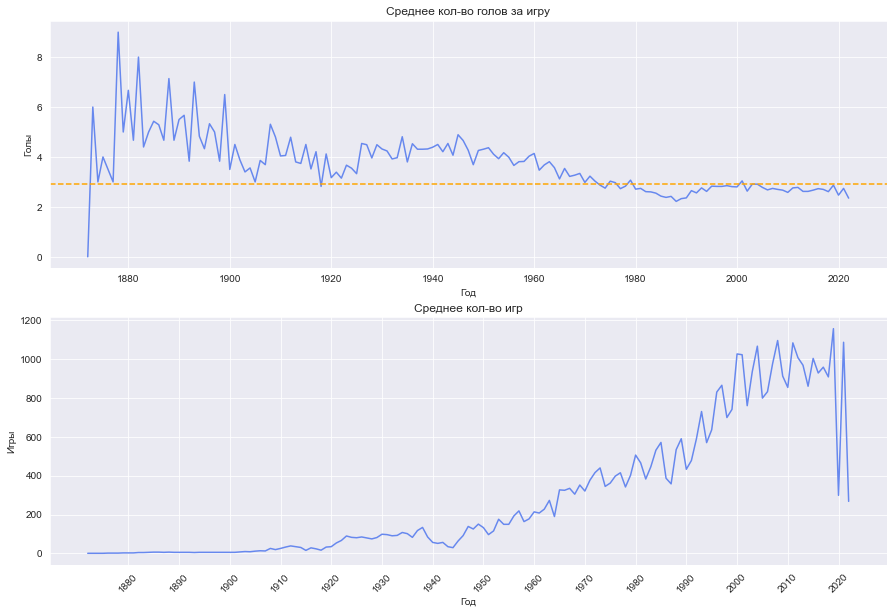

In [23]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

sns.set_palette('coolwarm') 
sns.set_style('darkgrid')
plt.xticks(rotation=45)
plt.title('Среднее кол-во игр')
plt.xticks(np.arange(1880,2022,10))
plt.yticks(np.arange(0,8,1))



axs = sns.lineplot(
    x='year', y='total_score',  data=avggoals_per_year,ax=axes[0]); 

axs.axhline(df['total_score'].mean(),color='orange',ls='--')
axs.set(xlabel='Год', ylabel='Голы',title='Среднее кол-во голов за игру')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10);


plt.yticks(np.arange(0,2000,200))
axn = sns.lineplot(
    x='year', y='games',  data=avggoals_per_year,ax=axes[1]); 
axn.set(xlabel='Год', ylabel='Игры');




Смотрим, что в среднем результативность команд изначально сильно колебалась (это можно связать с небольшим кол-вом игр) и после 50-ых годов с ростом популярности футбола началось увеличиваться кол-во матчей и (немного упало среднее кол-во голов за игру) 

кол-во матчей сыгранных 0 - 0

In [24]:
print('Процент матчей без забитых голов: {:.2f}%'.format(np.mean([df['total_score'] == 0]) * 100))

Процент матчей без забитых голов: 8.18%


In [25]:
games_without_goals = df.query('total_score == 0').groupby('year').agg({'total_score':'count'})\
  .reset_index().rename(columns={'total_score':'no_goal_games'})


avggoals_per_year = avggoals_per_year.merge(games_without_goals,how='left',on='year').fillna(0)




In [26]:
avggoals_per_year['percent_without_goals'] = round(avggoals_per_year['no_goal_games'] / avggoals_per_year['games'] * 100,0)


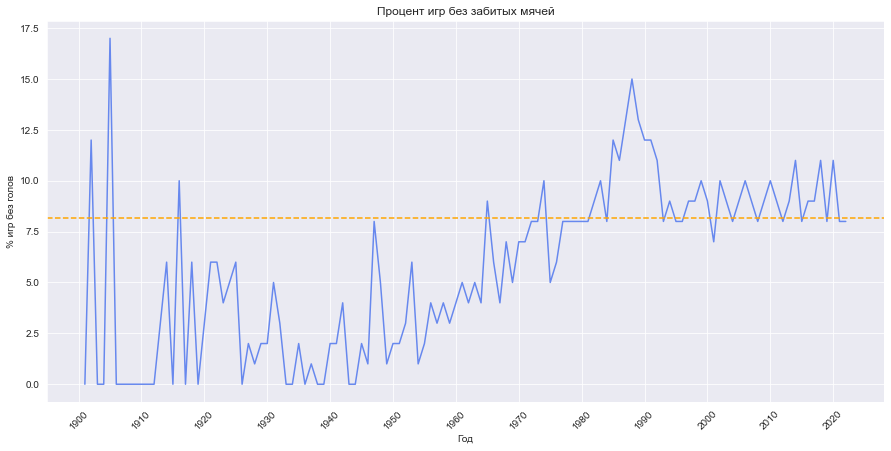

In [27]:
plt.figure(figsize=(15,7))

sns.set_palette('coolwarm') 
sns.set_style('darkgrid')
plt.xticks(rotation=45)
plt.title('Процент игр без голов')
plt.xticks(np.arange(1900,2022,10))

axs = sns.lineplot(
    x='year', y='percent_without_goals',  data=avggoals_per_year.query('year > 1900'));
axs.axhline(np.mean([df['total_score'] == 0]) * 100,color='orange',ls='--')
axs.set(xlabel='Год', ylabel='% игр без голов',title='Процент игр без забитых мячей');


В целом, процент игр без забитых мячей колеблется на среднем уровне. Наибольшего пика он достигал в 80-ые годы и самый расцвет итальянского футбола с их защитой

Команды с наибольшим кол-вом голов



In [28]:
home_scores = df[['home_team','home_score']].rename(columns={'home_team':'team','home_score':'score'})
away_scores = df[['away_team','away_score']].rename(columns={'away_team':'team','away_score':'score'})

score = pd.concat([home_scores,away_scores])

avg_goal = score.groupby('team').agg({'team':'count','score':'mean'})\
                .rename(columns={'team':'matches','score':'goal_per_game'})

avg_goal['goal_per_game'] = avg_goal['goal_per_game'].apply(lambda x:round(x,2))
avg_goal.sort_values(by='goal_per_game',ascending=False,inplace=True)
avg_goal.query('matches > 100').reset_index().head(20)

,team,matches,goal_per_game
0,New Caledonia,230,2.68
1,Tahiti,212,2.67
2,Papua New Guinea,119,2.36
3,Fiji,225,2.35
4,Solomon Islands,174,2.25
5,Germany,976,2.25
6,England,1038,2.19
7,Brazil,1011,2.19
8,Netherlands,811,2.07
9,Hungary,958,2.03


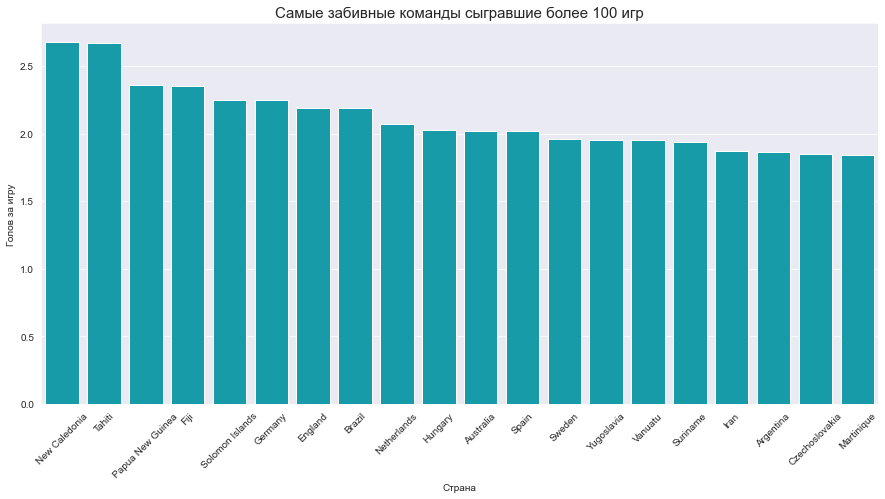

In [29]:
plt.figure(figsize=(15,7))

sns.set_palette('coolwarm') 
sns.set_style('darkgrid')
plt.xticks(rotation=45)
plt.title('Самые забивные команды сыгравшие более 100 игр',fontsize = 15)


bars = sns.barplot(data=avg_goal.query('matches > 100').reset_index().head(20),
                   x='team',
                   y='goal_per_game',
                   color='#00AFC1')

bars.set(xlabel='Страна', ylabel='Голов за игру')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)


autolabel(ax.patches, height_factor=1.01)

Самыми забивными командами, как ни странно, оказались Новая Каледония и Таити, из топовых сборных это Германия, Англия и Бпазилия

In [30]:
tournament_goals = df.groupby('tournament').agg({'total_score': 'mean'}).sort_values(by = "total_score", ascending = False)
tournament_goals.reset_index(inplace=True)


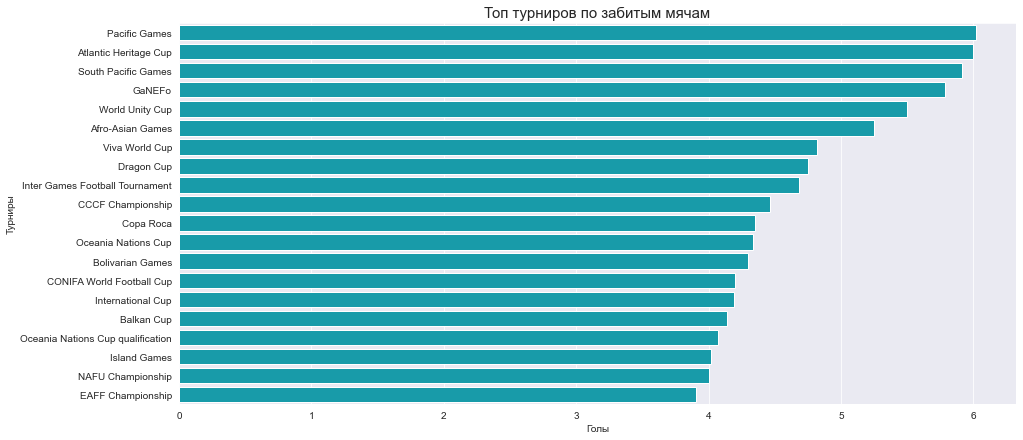

In [31]:
plt.figure(figsize = (15, 7))
sns.barplot(x = 'total_score',
            y = 'tournament',
            data=tournament_goals.query('tournament != "Friendly"').head(20),
            color='#00AFC1')

plt.title("Топ турниров по забитым мячам", fontsize = 15)
plt.xlabel("Голы")

plt.ylabel("Турниры");

Турниром с наибольшим кол-вом голов стал Тихоокеанский турнир. Примечательно, что в списке нет чемпионата Европы и Мира 